# Mini-Projeto 3 - KMeans e KMedoids

Grupo: Caio Fernandes, Carlos Mendes, Matheus Lafayette, Roberto Albuquerque e Thiago Alves

Importando bibliotecas necessárias

In [498]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, pairwise_distances
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Importando e visualizando dados

In [499]:
df = pd.read_csv('./College.csv')

df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Procurando por valores nulos

In [500]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

Dropando a coluna de private para usar aprendizado não supervisionado

In [501]:
df = df.drop(["Private", "Unnamed: 0"], axis=1)

Normalizar valores das tabelas

In [502]:
columns = df.columns
index = df.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=columns, index=index)

## Otimizando Kmeans

### Elbow method

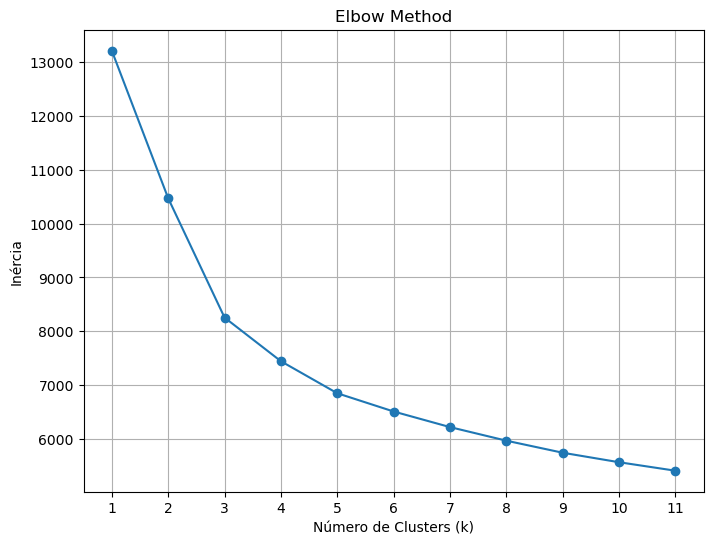

In [503]:
inertia_values = []
k_values = range(1, 12)  # Teste valores de k de 1 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Como é possível ver no gráfico acima, o melhor valor de K é 3, pois é o ponto onde é formado o "cotovelo" na curva do gráfico.

### Calinski-Harabasz

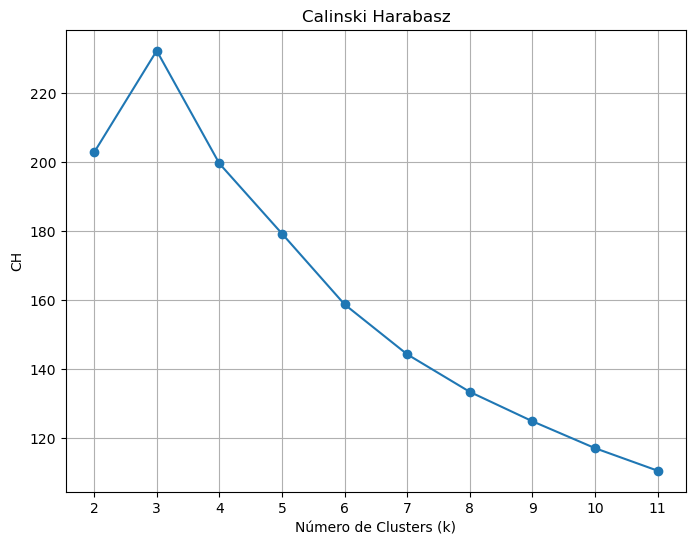

In [504]:
calinski_scores = []

k_values = range(2, 12)

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    kmeans.fit(df)
    
    calinski_score = calinski_harabasz_score(df, kmeans.labels_)
    
    calinski_scores.append(calinski_score)


plt.figure(figsize=(8, 6))
plt.plot(k_values, calinski_scores, marker='o')
plt.title('Calinski Harabasz')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('CH')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Observando o gráfico acima, percebe-se que o melhor valor de K é 3, pois é onde o valor de CH é maior.

### Davies Bouldin

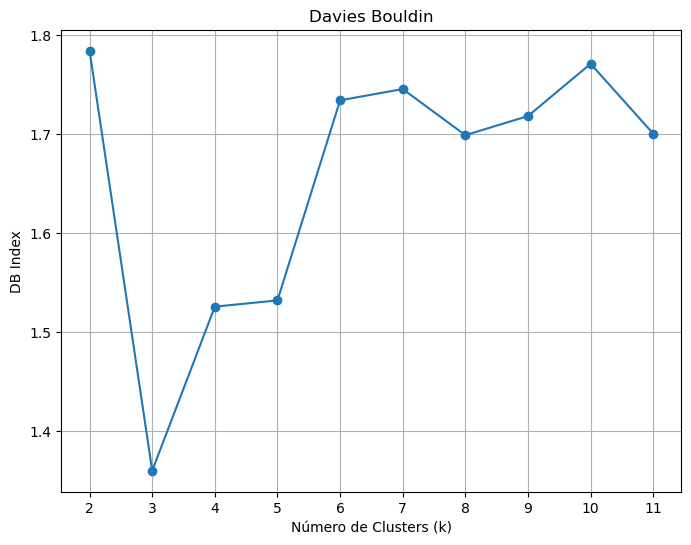

In [505]:
davies_bouldin_scores = []

k_values = range(2, 12)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

    kmeans.fit(df)

    db_score = davies_bouldin_score(df, kmeans.labels_)
    davies_bouldin_scores.append(db_score)

plt.figure(figsize=(8, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies Bouldin')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('DB Index')
plt.xticks(k_values)
plt.grid(True)
plt.show()

O melhor valor de K é 3, pois é onde o valor o DB Index é menor.

### Silhouette

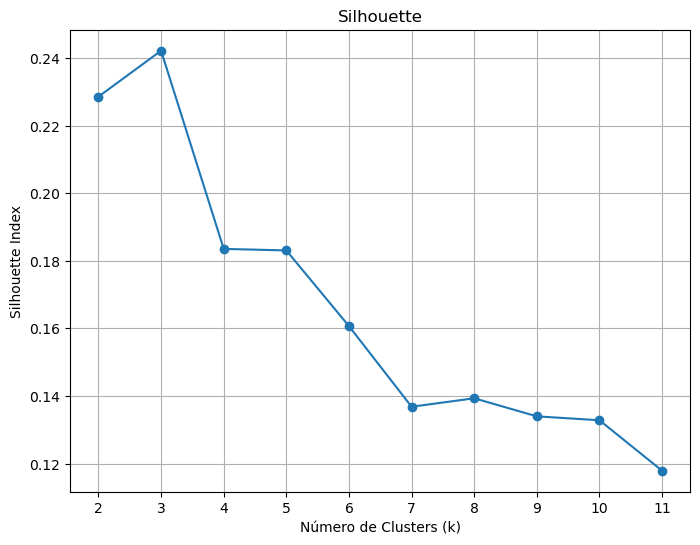

In [506]:
silhouette_scores = []

k_values = range(2, 12)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    kmeans.fit(df)

    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Index')
plt.xticks(k_values)
plt.grid(True)
plt.show()

O melhor valor de K é 3, pois é onde o valor do Silhouette Index é maior.

### BIC

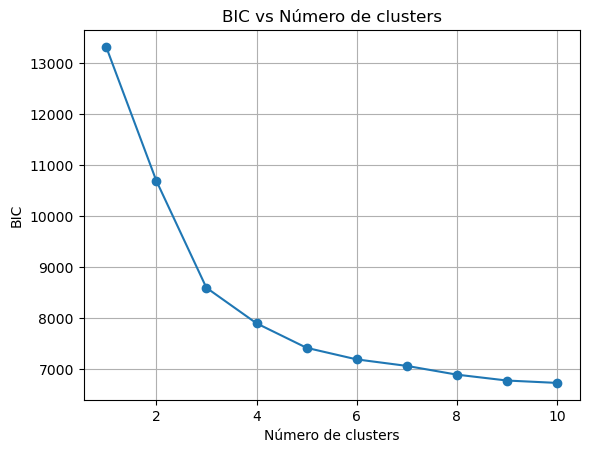

In [507]:
bic = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)
    
    bic.append(kmeans.inertia_ + k * np.log(df.shape[0]) * df.shape[1])

plt.plot(K, bic, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('BIC')
plt.title('BIC vs Número de clusters')
plt.grid(True)
plt.show()

Dessa forma concluímos que o valor ideal para K utilizando kmeans é 3.

## Otimizando kmedoids

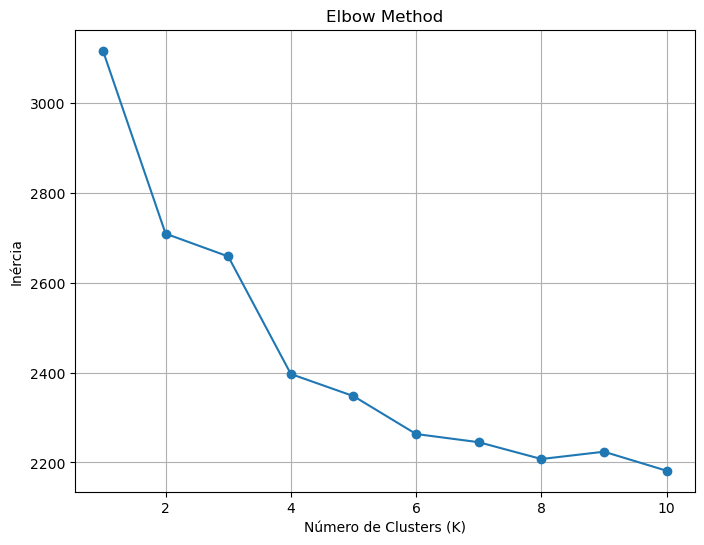

In [508]:
k_values = range(1, 11)

inertia = []

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(df)
    inertia.append(kmedoids.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

Como é possível ver no gráfico acima, o melhor valor de K é 2, pois é o ponto onde é formado o "cotovelo" na curva do gráfico.

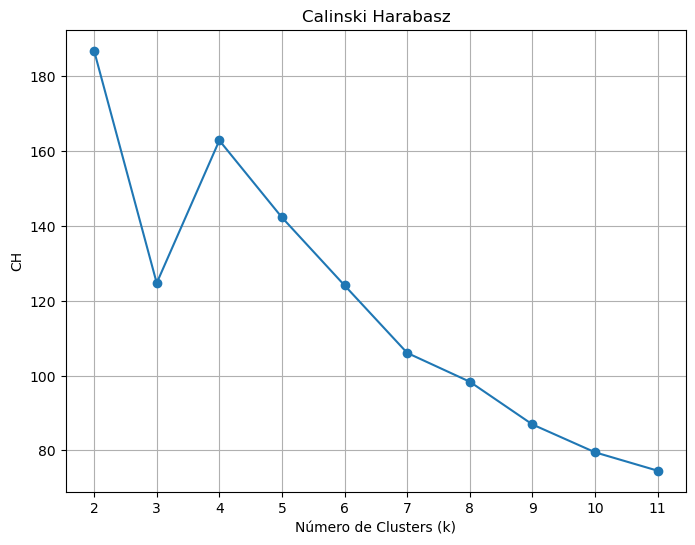

In [509]:
calinski_scores = []

k_values = range(2, 12)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    
    kmedoids.fit(df)
    
    calinski_score = calinski_harabasz_score(df, kmedoids.labels_)

    calinski_scores.append(calinski_score)


plt.figure(figsize=(8, 6))
plt.plot(k_values, calinski_scores, marker='o')
plt.title('Calinski Harabasz')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('CH')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Observando o gráfico acima, percebe-se que o melhor valor de K é 2, pois é o ponto onde o CH é maior.

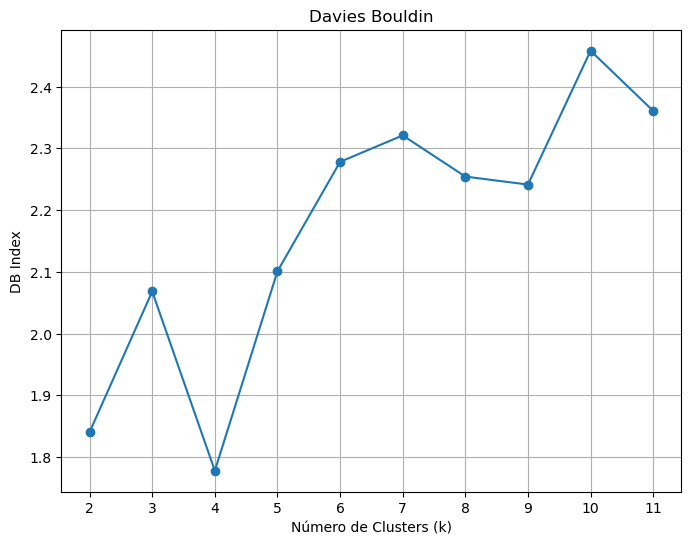

In [510]:
davies_bouldin_scores = []

k_values = range(2, 12)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0)

    kmedoids.fit(df)
    
    score = davies_bouldin_score(df, kmedoids.labels_)

    davies_bouldin_scores.append(score)


plt.figure(figsize=(8, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies Bouldin')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('DB Index')
plt.xticks(k_values)
plt.grid(True)
plt.show()


O melhor valor de K é 4, pois é onde o valor o DB Index é menor.

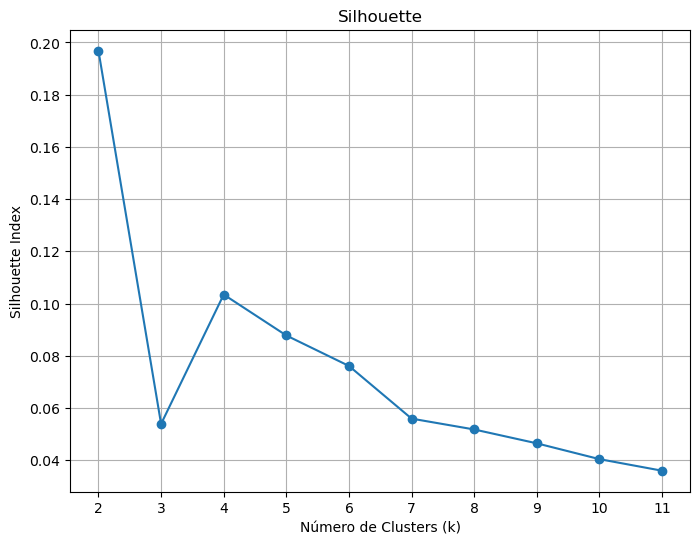

In [511]:
silhouette_scores = []

k_values = range(2, 12)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=0)

    kmedoids.fit(df)

    silhouette_avg = silhouette_score(df, kmedoids.labels_)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Index')
plt.xticks(k_values)
plt.grid(True)
plt.show()

O melhor valor de K é 2, pois é onde o valor do Silhouette Index é maior.

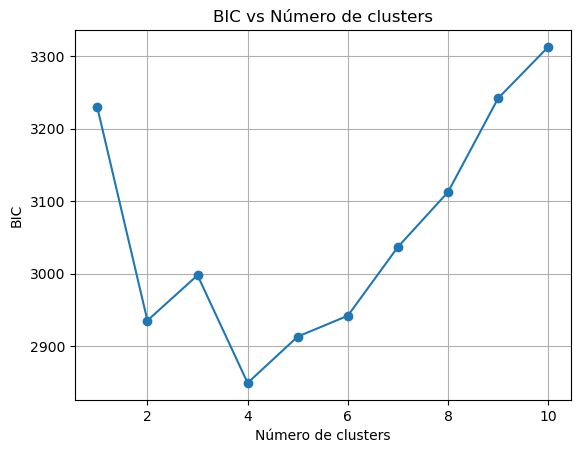

In [512]:
bic = []

K = range(1, 11)
for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42).fit(df)

    bic.append(kmedoids.inertia_ + k * np.log(df.shape[0]) * df.shape[1])

plt.plot(K, bic, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('BIC')
plt.title('BIC vs Número de clusters')
plt.grid(True)
plt.show()

## Calculando as distâncias inter-clusters e intra-clusters

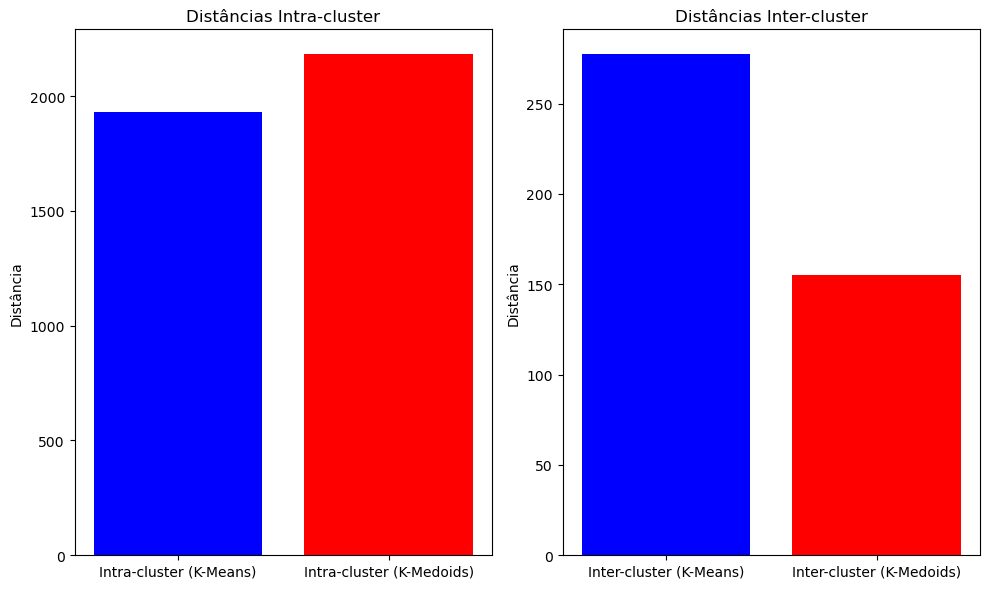

In [513]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances
import pandas as pd

# Configurar o número de clusters
kmeans_k = 3
kmedoids_k = 2

# Inicializar os modelos K-Means e K-Medoids
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmedoids = KMedoids(n_clusters=k, random_state=0)

# Executar os algoritmos K-Means e K-Medoids
kmeans_labels = kmeans.fit_predict(df)
kmedoids_labels = kmedoids.fit_predict(df)

# Calcular os centróides dos clusters
kmeans_centroids = kmeans.cluster_centers_
kmedoids_medoids = df.iloc[kmedoids.medoid_indices_]

# Calcular distâncias intra-cluster para K-Means
intra_cluster_distances_kmeans = []
for i in range(k):
    cluster_points = df[kmeans_labels == i]
    centroid = kmeans_centroids[i]
    distances = pairwise_distances(cluster_points, [centroid], metric='euclidean')
    intra_cluster_distances_kmeans.extend(distances)

# Calcular distâncias inter-cluster para K-Means
inter_cluster_distances_kmeans = []
for i in range(k):
    for j in range(i + 1, k):
        distance = np.linalg.norm(kmeans_centroids[i] - kmeans_centroids[j])
        inter_cluster_distances_kmeans.append(distance)

# Calcular distâncias intra-cluster para K-Medoids
intra_cluster_distances_kmedoids = []
for i in range(k):
    cluster_points = df[kmedoids_labels == i]
    medoid = kmedoids_medoids.iloc[i]
    distances = pairwise_distances(cluster_points, [medoid], metric='euclidean')
    intra_cluster_distances_kmedoids.extend(distances)

# Calcular distâncias inter-cluster para K-Medoids
inter_cluster_distances_kmedoids = []
for i in range(k):
    for j in range(i + 1, k):
        distance = np.linalg.norm(kmedoids_medoids.iloc[i] - kmedoids_medoids.iloc[j])
        inter_cluster_distances_kmedoids.append(distance)

# Plotar gráfico de barras para distâncias intra-cluster (K-Means e K-Medoids)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
labels = ['Intra-cluster (K-Means)', 'Intra-cluster (K-Medoids)']
values = [np.sum(intra_cluster_distances_kmeans), np.sum(intra_cluster_distances_kmedoids)]
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Distância')
plt.title('Distâncias Intra-cluster')

# Plotar gráfico de barras para distâncias inter-cluster (K-Means e K-Medoids)
plt.subplot(1, 2, 2)
labels = ['Inter-cluster (K-Means)', 'Inter-cluster (K-Medoids)']
values = [np.sum(inter_cluster_distances_kmeans), np.sum(inter_cluster_distances_kmedoids)]
plt.bar(labels, values, color=['blue', 'red'])
plt.ylabel('Distância')
plt.title('Distâncias Inter-cluster')

plt.tight_layout()
plt.show()


No método K-Means, a distância intra-cluster foi menor em comparação com o K-Medoids, indicando que os pontos dentro dos clusters estavam mais próximos do centroide. Além disso, a distância inter-cluster foi maior no K-Means, sugerindo uma melhor separação e distinção entre os clusters.
Portanto, percebe-se que o K-Means se saiu melhor.

## Fazendo perguntas aos clusters

In [514]:
df2 = pd.read_csv('./College.csv')
df2 = df2.drop(['Unnamed: 0'], axis=1)

def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
    
df2['Cluster'] = df2['Private'].apply(converter)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(df2.drop(['Private', 'Cluster'], axis=1))



labels_kmeans = kmeans.labels_
result_kmeans = pd.concat([pd.DataFrame(labels_kmeans), df2], axis=1)
result_kmeans.rename({0: 'Result'}, inplace = True, axis=1)

agg_kmeans = result_kmeans.groupby(by='Result').mean().reset_index()

/tmp/ipykernel_6877/624400866.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_kmeans = result_kmeans.groupby(by='Result').mean().reset_index()


In [515]:
agg_kmeans.head()

,Result,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,0,1701.823009,1236.534513,491.520354,21.819469,49.776991,2226.180531,656.030088,9281.939823,4143.706195,537.015929,1329.796460,67.578761,75.143363,14.636283,20.927434,7830.746903,62.807080,0.761062
1,1,10621.614458,7300.638554,2939.421687,32.000000,63.469880,15482.506024,3174.554217,8235.855422,4134.879518,594.349398,1888.337349,84.156627,89.554217,16.407229,15.807229,9440.951807,60.506024,0.084337
2,2,3791.852713,2046.635659,653.937984,49.837209,77.224806,2573.550388,235.829457,16934.325581,5437.279070,574.604651,1035.751938,87.519380,93.333333,10.204651,35.162791,17813.813953,80.286822,0.992248


[Text(0.5, 1.0, 'Proporção de escolas privadas por Cluster (K-Means)')]

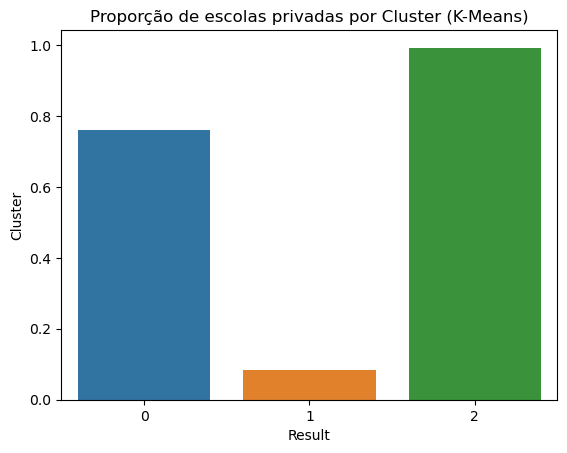

In [516]:
sns.barplot(data=agg_kmeans, x='Result', y='Cluster').set(title='Proporção de escolas privadas por Cluster (K-Means)')

Vamos visualizar a distribuição dos clusters

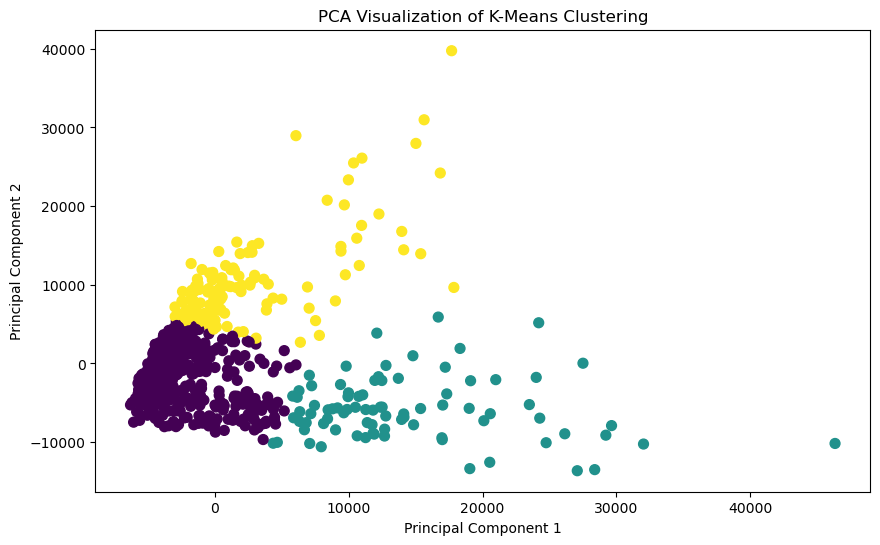

In [517]:
from sklearn.decomposition import PCA

df2 = df2.drop(['Private', 'Cluster'], axis=1)

# Fit K-Means to your data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(df2)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df2)

# Add cluster labels to the DataFrame
df2['Cluster'] = kmeans.labels_

# Create a scatter plot of the PCA results with color-coded clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df2['Cluster'], cmap='viridis', s=50)
plt.title('PCA Visualization of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

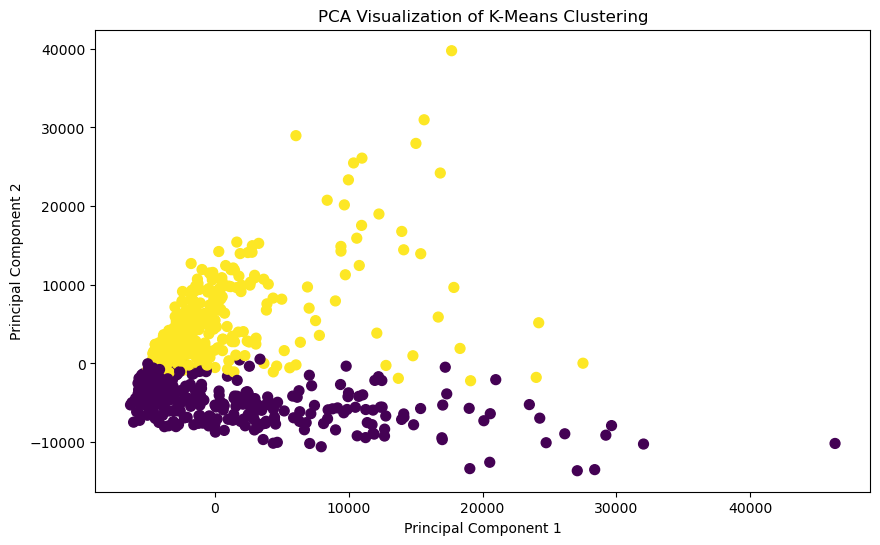

In [518]:
from sklearn.decomposition import PCA

# Fit K-Means to your data
kmedoid = KMedoids(n_clusters=2, random_state=42).fit(df2)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df2)

# Add cluster labels to the DataFrame
df2['Cluster'] = kmedoid.labels_

# Create a scatter plot of the PCA results with color-coded clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df2['Cluster'], cmap='viridis', s=50)
plt.title('PCA Visualization of K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()